In [1]:
# Import Libraries 

import numpy as np 
from keras.models import Sequential
import tensorflow as tf
from keras.layers import LSTM, Input, Dropout, Dense, RepeatVector, TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
import random 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
import seaborn as sns 
import time
import plotly.graph_objs as go
from plotly.subplots import make_subplots

Number of rows where zero values were replaced: 602766
Remaining rows with zero values: 0
Start date is: 2024-11-29 20:40:32
End date is: 2024-12-06 20:40:32


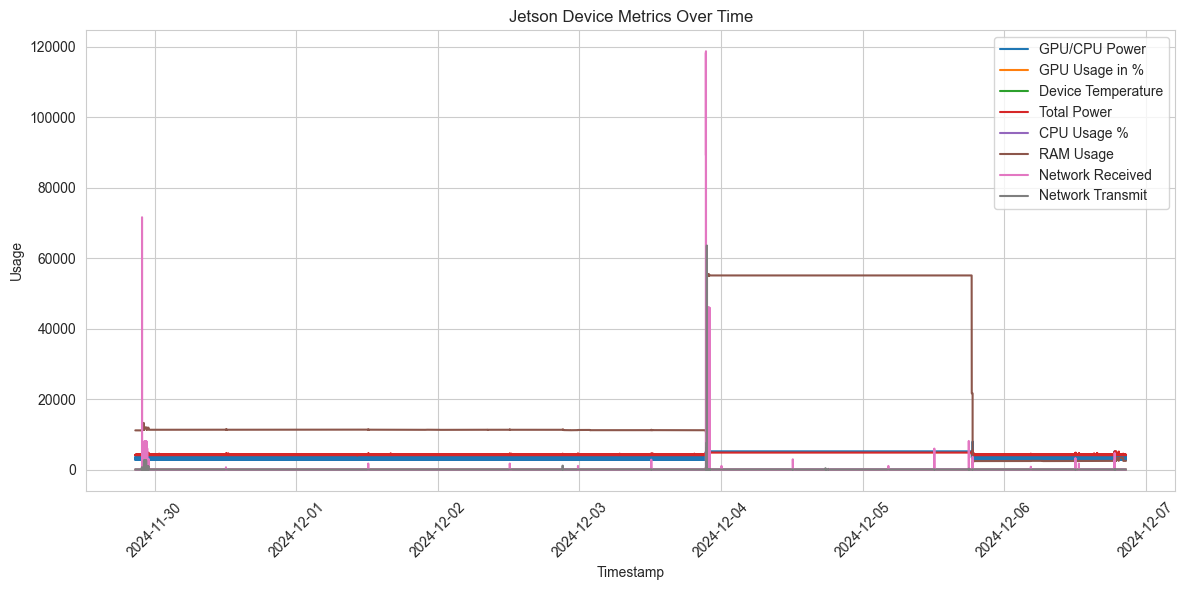

,jetson_vdd_cpu_gpu_cv_mw,jetson_gpu_usage_percent,jetson_board_temperature_celsius,jetson_vdd_in_mw,jetson_cpu_usage_percent,jetson_ram_usage_mb,node_network_receive_bytes_total_KBps,node_network_transmit_bytes_total_KBps
timestamp,,,,,,,,
2024-11-29 20:40:32,2792.0,0.01,38.0186,4126.0,1.375,11132.0,1.0,11.0
2024-11-29 20:40:33,2792.0,0.01,37.9746,4126.0,0.875,11133.0,1.0,11.0
2024-11-29 20:40:34,2792.0,0.01,38.0184,4126.0,1.250,11133.0,1.0,11.0
2024-11-29 20:40:35,2792.0,0.01,38.0686,4126.0,1.250,11134.0,1.0,11.0
2024-11-29 20:40:36,2792.0,0.01,38.0244,4126.0,1.000,11134.0,1.0,11.0
...,...,...,...,...,...,...,...,...
2024-12-06 20:40:28,2792.0,0.01,39.1434,4126.0,1.125,2479.0,1.0,10.0
2024-12-06 20:40:29,2792.0,0.01,39.2312,4126.0,1.125,2479.0,1.0,10.0
2024-12-06 20:40:30,2792.0,0.01,39.1996,4126.0,0.750,2479.0,1.0,10.0


In [2]:
# Set random seed 
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Load the dataset
data1 = pd.read_csv('FL_client/src/Train_data/AGX04/AGX04.csv')
dataframe = data1

# Convert 'timestamp' column to datetime
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])

# Filter relevant columns
df = dataframe[['timestamp', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_gpu_usage_percent', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent',
                'jetson_ram_usage_mb', 'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']]
df.set_index('timestamp', inplace=True)
# Replace zero values with 0.01
df.replace(0, 0.01, inplace=True)

# Count the number of rows where zero values were replaced with 0.01
num_rows_with_zero_replaced = len(df[(df == 0.01).any(axis=1)])
print(f"Number of rows where zero values were replaced: {num_rows_with_zero_replaced}")

# check if there are any remaining zero values
remaining_zeros = df[(df == 0).any(axis=1)]
print(f"Remaining rows with zero values: {len(remaining_zeros)}")
# Print start and end date
print("Start date is:", df.index.min())
print("End date is:", df.index.max())

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='jetson_vdd_cpu_gpu_cv_mw', data=df, label='GPU/CPU Power')
sns.lineplot(x=df.index, y='jetson_gpu_usage_percent', data=df, label='GPU Usage in %')
sns.lineplot(x=df.index, y='jetson_board_temperature_celsius', data=df, label='Device Temperature')
sns.lineplot(x=df.index, y='jetson_vdd_in_mw', data=df, label='Total Power')
sns.lineplot(x=df.index, y='jetson_cpu_usage_percent', data=df, label='CPU Usage %')
sns.lineplot(x=df.index, y='jetson_ram_usage_mb', data=df, label='RAM Usage')
sns.lineplot(x=df.index, y='node_network_receive_bytes_total_KBps', data=df, label='Network Received')
sns.lineplot(x=df.index, y='node_network_transmit_bytes_total_KBps', data=df, label='Network Transmit')
plt.title('Jetson Device Metrics Over Time')
plt.ylabel('Usage')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.gcf().set_facecolor('white')
plt.legend()
plt.tight_layout()
plt.show()

# # Create a subplot for better visualization of multiple columns
# fig = make_subplots(
#     rows=len(df.columns), cols=1,
#     shared_xaxes=True,
#     vertical_spacing=0.02,
#     subplot_titles=df.columns.tolist()
# )
# 
# # Iterate through each column and add a line plot
# for i, column in enumerate(df.columns):
#     fig.add_trace(
#         go.Scatter(
#             x=df.index, 
#             y=df[column],
#             mode='lines',
#             name=column
#         ),
#         row=i+1, col=1
#     )
# 
# # Update layout for better visualization
# fig.update_layout(
#     height=300 * len(df.columns),  # Adjust height based on number of columns
#     title_text="Time-Series Data Visualization",
#     xaxis_title="Timestamp",
#     yaxis_title="Value",
#     template="plotly_dark"
# )
# 
# # Show the plot
# fig.show()
df

In [19]:
# Scaling the dataset

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()
# 
# df_to_scale = df[['jetson_vdd_cpu_gpu_cv_mw', 'jetson_gpu_usage_percent', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent',
#                 'jetson_ram_usage_mb', 'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']]
# # df_to_scale = df_to_scale + 1e-7
# df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns, index=df.index)
# 
# plt.figure(figsize=(12, 6))
# sns.lineplot(x=df_scaled.index, y='jetson_vdd_cpu_gpu_cv_mw', data=df_scaled, label='GPU/CPU Power')
# sns.lineplot(x=df_scaled.index, y='jetson_gpu_usage_percent', data=df_scaled, label='GPU Usage in %')
# sns.lineplot(x=df_scaled.index, y='jetson_board_temperature_celsius', data=df_scaled, label='Device Temperature')
# sns.lineplot(x=df_scaled.index, y='jetson_vdd_in_mw', data=df, label='Total Power')
# sns.lineplot(x=df_scaled.index, y='jetson_cpu_usage_percent', data=df, label='CPU Usage %')
# sns.lineplot(x=df_scaled.index, y='jetson_ram_usage_mb', data=df, label='RAM Usage')
# sns.lineplot(x=df_scaled.index, y='node_network_receive_bytes_total_KBps', data=df, label='Network Received')
# sns.lineplot(x=df_scaled.index, y='node_network_transmit_bytes_total_KBps', data=df, label='Network Transmit')
# plt.title('Scaled Jetson Device Metrics Over Time (Scaled MinMax)')
# plt.ylabel('Scaled Values')
# plt.xlabel('Timestamp')
# plt.xticks(rotation=45)
# plt.gcf().set_facecolor('white')
# plt.legend()
# plt.tight_layout()
# plt.show()
# 
# print("min max", df_scaled.head())

# # Initialize the StandardScaler
# scaler_standard = StandardScaler()
# 
# df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df_to_scale), columns=df_to_scale.columns, index=df.index)

# plt.figure(figsize=(12, 6))
# sns.lineplot(x=df_standard_scaled.index, y='jetson_total_cpu_usage', data=df_standard_scaled, label='CPU Usage (Standard)')
# #sns.lineplot(x=df_standard_scaled.index, y='jetson_ram_usage', data=df_standard_scaled, label='RAM Usage (Standard)')
# sns.lineplot(x=df_standard_scaled.index, y='jetson_temperature', data=df_standard_scaled, label='Device Temperature (Standard)')
# #sns.lineplot(x=df_standard_scaled.index, y='jetson_emc_freq', data=df_standard_scaled, label='EMC Frequency (Standard)')
# #sns.lineplot(x=df_standard_scaled.index, y='jetson_gpu_freq', data=df_standard_scaled, label='GPU Usage (Standard)')
# #sns.lineplot(x=df_standard_scaled.index, y='jetson_swap_usage', data=df_standard_scaled, label='Swap Memory (Standard)')
# plt.title('Scaled Jetson Device Metrics Over Time (Standard Scaler)')
# plt.ylabel('Standardized Values')
# plt.xlabel('Timestamp')
# plt.xticks(rotation=45)
# plt.gcf().set_facecolor('white')
# plt.legend()
# plt.tight_layout()
# plt.show()

# print(" standard scaling", df_standard_scaled.head())

Train start date: 2024-12-02 20:42:05
Train end date: 2024-12-03 15:54:04
Test start date: 2024-12-03 15:54:05
Test end date: 2024-12-03 20:42:05
Train set shape: (69120, 8)
Test set shape: (17281, 8)


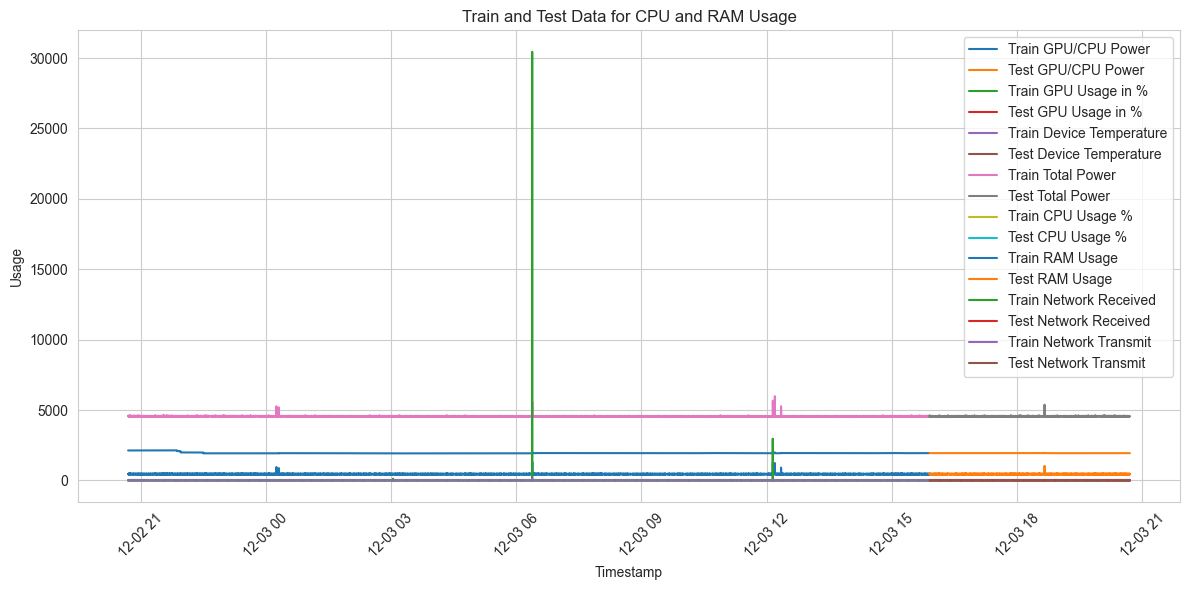

train data                      jetson_vdd_cpu_gpu_cv_mw  jetson_gpu_usage_percent  \
timestamp                                                                 
2024-12-02 20:42:05                       478                      0.01   
2024-12-02 20:42:06                       478                      0.01   
2024-12-02 20:42:07                       478                      0.01   
2024-12-02 20:42:08                       478                      0.01   
2024-12-02 20:42:09                       478                      0.01   

                     jetson_board_temperature_celsius  jetson_vdd_in_mw  \
timestamp                                                                 
2024-12-02 20:42:05                         38.926667              4592   
2024-12-02 20:42:06                         38.869333              4552   
2024-12-02 20:42:07                         39.004667              4592   
2024-12-02 20:42:08                         39.093500              4592   
2024-12-02 20

In [20]:
# Train and Test Split 
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Print the start and end dates for each split
print("Train start date:", train.index.min())
print("Train end date:", train.index.max())
print("Test start date:", test.index.min())
print("Test end date:", test.index.max())
print("Train set shape:", train.shape)
print("Test set shape:", test.shape)

# Create a line plot for both train and test data
plt.figure(figsize=(12, 6))

# Plot the split
sns.lineplot(x=train.index, y=train['jetson_vdd_cpu_gpu_cv_mw'], label='Train GPU/CPU Power')
sns.lineplot(x=test.index, y=test['jetson_vdd_cpu_gpu_cv_mw'], label='Test GPU/CPU Power')

sns.lineplot(x=train.index, y=train['jetson_gpu_usage_percent'], label='Train GPU Usage in %')
sns.lineplot(x=test.index, y=test['jetson_gpu_usage_percent'], label='Test GPU Usage in %')

sns.lineplot(x=train.index, y=train['jetson_board_temperature_celsius'], label='Train Device Temperature')
sns.lineplot(x=test.index, y=test['jetson_board_temperature_celsius'], label='Test Device Temperature')

sns.lineplot(x=train.index, y=train['jetson_vdd_in_mw'], label='Train Total Power')
sns.lineplot(x=test.index, y=test['jetson_vdd_in_mw'], label='Test Total Power')

sns.lineplot(x=train.index, y=train['jetson_cpu_usage_percent'], label='Train CPU Usage %')
sns.lineplot(x=test.index, y=test['jetson_cpu_usage_percent'], label='Test CPU Usage %')

sns.lineplot(x=train.index, y=train['jetson_ram_usage_mb'], label='Train RAM Usage')
sns.lineplot(x=test.index, y=test['jetson_ram_usage_mb'], label='Test RAM Usage')

sns.lineplot(x=train.index, y=train['node_network_receive_bytes_total_KBps'], label='Train Network Received')
sns.lineplot(x=test.index, y=test['node_network_receive_bytes_total_KBps'], label='Test Network Received')

sns.lineplot(x=train.index, y=train['node_network_transmit_bytes_total_KBps'], label='Train Network Transmit')
sns.lineplot(x=test.index, y=test['node_network_transmit_bytes_total_KBps'], label='Test Network Transmit')

plt.title('Train and Test Data for CPU and RAM Usage')
plt.ylabel('Usage')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
print("train data", train.head())
print("test data", test.head())


In [21]:
seq_size = 40 # Number of time steps to look back 
# larger sequence size (look further back) may improve forecasting 

def to_sequence(x, y, seq_size=1):
    x_values = []
    y_values = []
    
    for i in range(len(x)-seq_size):
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i:(i+seq_size)].values)  # Adjust this line for correct target shape
        
    return np.array(x_values), np.array(y_values)


trainX, trainY = to_sequence(
    train[['jetson_vdd_cpu_gpu_cv_mw', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent', 'jetson_ram_usage_mb', 
           'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']], 
    train[['jetson_vdd_cpu_gpu_cv_mw', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent', 'jetson_ram_usage_mb', 
           'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']], 
    seq_size
)

testX, testY = to_sequence(
    test[['jetson_vdd_cpu_gpu_cv_mw', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent', 'jetson_ram_usage_mb', 
           'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']], 
    test[['jetson_vdd_cpu_gpu_cv_mw', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent', 'jetson_ram_usage_mb', 
           'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']], 
    seq_size
)


print("train X shape", trainX.shape)
print("train Y shape", trainY.shape)
print("test X shape", testX.shape)
print("test Y shape", testY.shape)


train X shape (69080, 40, 8)
train Y shape (69080, 40, 8)
test X shape (17241, 40, 8)
test Y shape (17241, 40, 8)


In [22]:
model = Sequential()
model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(32, activation='tanh', recurrent_activation='sigmoid', return_sequences=False))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(32, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(TimeDistributed(Dense(trainX.shape[2])))

# Compile model
model.compile(optimizer='adam', loss='mae', metrics=["mape"])
model.summary()

C:\Users\muhammad.karim\Desktop\project\INVERTER-LSTM\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 40, 256)        │       271,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 40, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 40, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 40, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 40, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 40, 8)          │         2,056 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,046,024 (3.99 MB)

 Trainable params: 1,046,024 (3.99 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Measure the time
start_training_time = time.time()
# Fit the model
history = model.fit(trainX, trainY, epochs=50, batch_size=128, validation_split=0.2, verbose=1)
end_training_time = time.time()
training_time = end_training_time - start_training_time
print(f"Total training time: {training_time:.2f} seconds")

Epoch 1/50
 37/432 ━━━━━━━━━━━━━━━━━━━━ 3:20 507ms/step - loss: 906.1576 - mape: 52.9904

KeyboardInterrupt: 

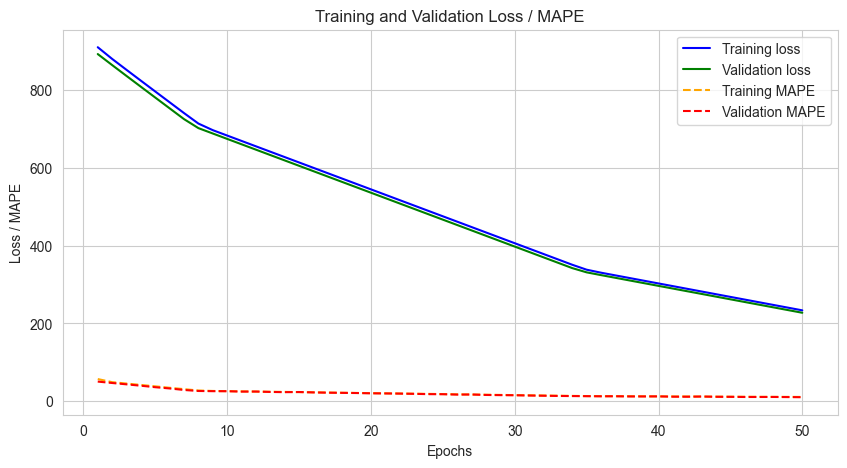

Final Training Loss: 233.71484375
Final Validation Loss: 227.49655151367188
Final Training MAPE: 11.112123489379883
Final Validation MAPE: 10.40638256072998


In [116]:
# training history
training_loss = history.history['loss']
training_mape = history.history['mape']
val_loss = history.history['val_loss']
val_mape = history.history['val_mape']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 5))

# Plot training and validation loss 
plt.plot(epochs, training_loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')

# Plot training and validation MAPE 
plt.plot(epochs, training_mape, color='orange', linestyle='--', label='Training MAPE')
plt.plot(epochs, val_mape, color='red', linestyle='--', label='Validation MAPE')

plt.title('Training and Validation Loss / MAPE')
plt.xlabel('Epochs')
plt.ylabel('Loss / MAPE')
plt.grid(True)
plt.legend()
plt.show()

# Extract the final loss and MAPE values
final_training_loss = training_loss[-1]
final_val_loss = val_loss[-1]
final_training_mape = training_mape[-1]
final_val_mape = val_mape[-1]

# Print the final loss and MAPE values
print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Training MAPE:", final_training_mape)
print("Final Validation MAPE:", final_val_mape)


2159/2159 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step
Mean of Train MAE: 229.69651158643393


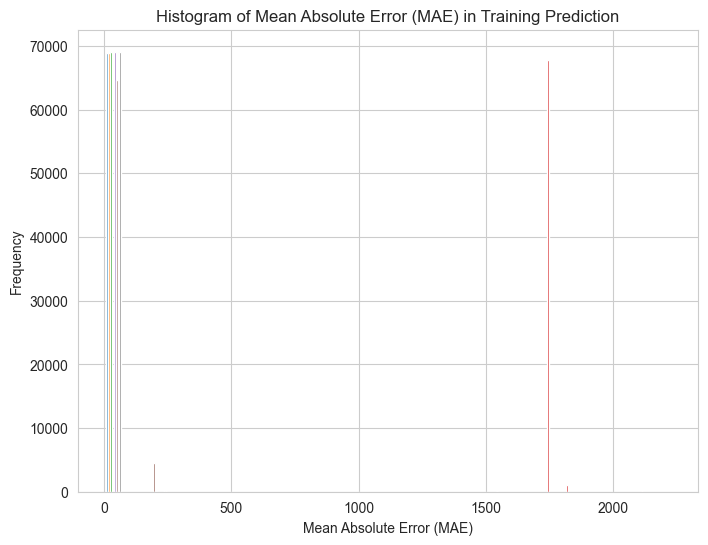

Mean of Train MAPE: 10.626791185252024


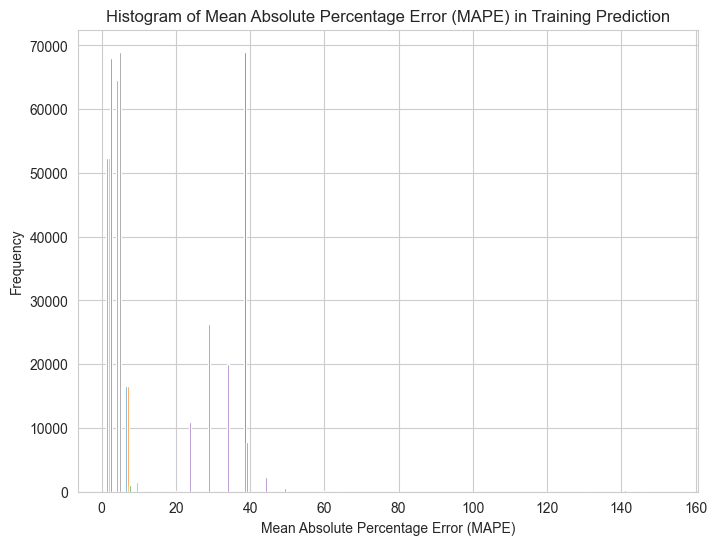

(69080, 8)
(69080, 8)


In [117]:
# When reconstruction error (MAPE) is larger than the threshold which we set then there is anomaly

# Calculate MAE for training prediction
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
# trainMAE = trainMAE.flatten()
# Print the mean of test MAE
print("Mean of Train MAE:", np.mean(trainMAE))

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(trainMAE, bins=30)
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Absolute Error (MAE) in Training Prediction')
plt.show()

# Calculate MAPE for each sample
trainActual = trainX  
trainMAPE = np.mean(np.abs(trainPredict - trainActual) / trainActual, axis=1) * 100
# trainMAPE = trainMAPE.flatten()

# Print the mean of MAPE
print("Mean of Train MAPE:", np.mean(trainMAPE))

# Plot histogram of MAPE
plt.figure(figsize=(8, 6))
plt.hist(trainMAPE, bins=30)
plt.xlabel('Mean Absolute Percentage Error (MAPE)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Absolute Percentage Error (MAPE) in Training Prediction')
plt.show()

print(trainMAE.shape)
print(trainMAPE.shape)


539/539 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step
Mean of Test MAE: 228.5989068467446


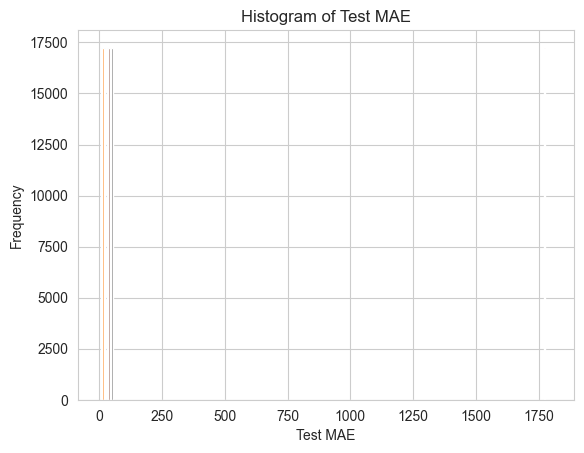

Mean of Test MAPE: 10.671950483217001


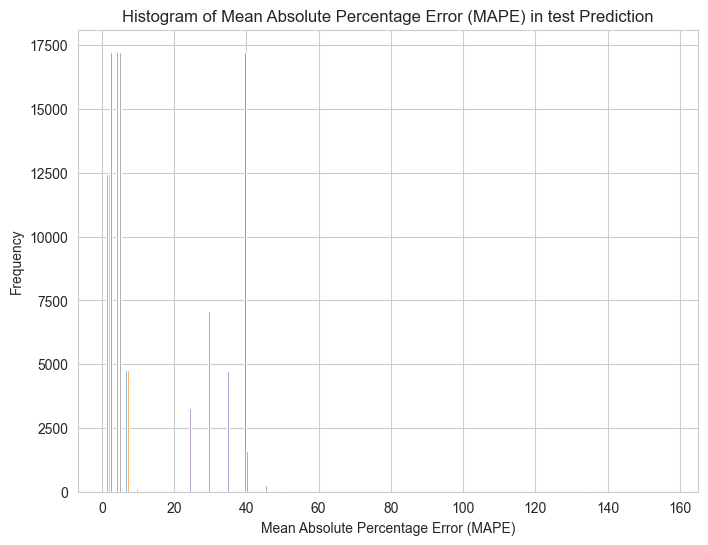

In [118]:
# Calculate reconstruction loss (MAE) for testing dataset
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)

# Print the mean of test MAE
print("Mean of Test MAE:", np.mean(testMAE))

# Plot histogram
plt.hist(testMAE, bins=30)
plt.xlabel('Test MAE')
plt.ylabel('Frequency')
plt.title('Histogram of Test MAE')
plt.show()

# Calculate MAPE for each sample
testActual = testX  # Assuming trainX contains the actual values
testMAPE = np.mean(np.abs(testPredict - testActual) / testActual, axis=1) * 100

# Print the mean of MAPE
print("Mean of Test MAPE:", np.mean(testMAPE))

# Plot histogram of MAPE
plt.figure(figsize=(8, 6))
plt.hist(testMAPE, bins=30)
plt.xlabel('Mean Absolute Percentage Error (MAPE)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Absolute Percentage Error (MAPE) in test Prediction')
plt.show()

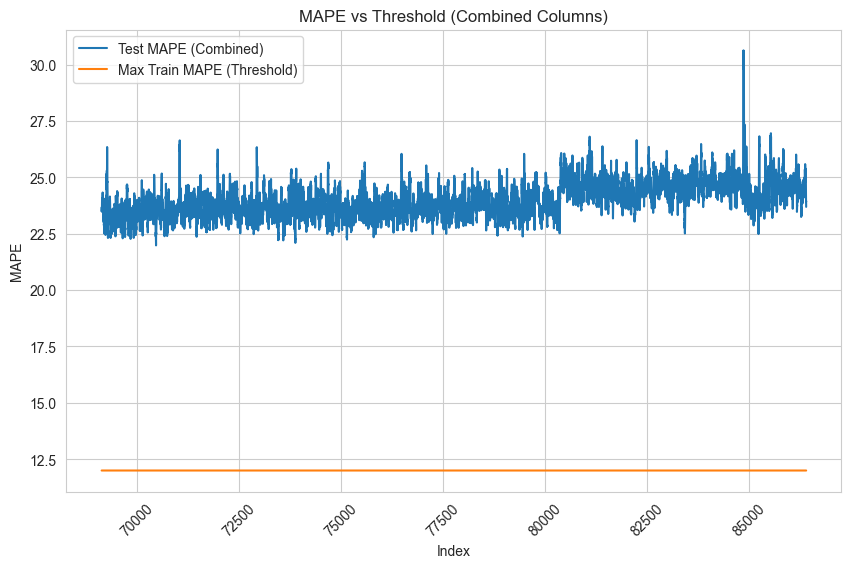

In [57]:
max_trainMAE = 0.76
max_trainMAPE = 12
# thresholding using MAPE 
# Assuming testMAPE has two columns: 'jetson_total_cpu_usage' and 'jetson_temperature'
testMAPE_combined = np.mean(testMAPE, axis=1)  # Combine by averaging the two columns

# Create anomaly DataFrame
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAPE'] = testMAPE_combined  # Use the combined MAPE
anomaly_df['max_trainMAPE'] = max_trainMAPE  # Threshold
anomaly_df['anomaly'] = anomaly_df['testMAPE'] > anomaly_df['max_trainMAPE']

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=anomaly_df.index, y=anomaly_df['testMAPE'], label='Test MAPE (Combined)')
sns.lineplot(x=anomaly_df.index, y=anomaly_df['max_trainMAPE'], label='Max Train MAPE (Threshold)')
plt.xticks(rotation=45)
plt.xlabel("Index")
plt.ylabel("MAPE")
plt.title("MAPE vs Threshold (Combined Columns)")
plt.legend()
plt.show()



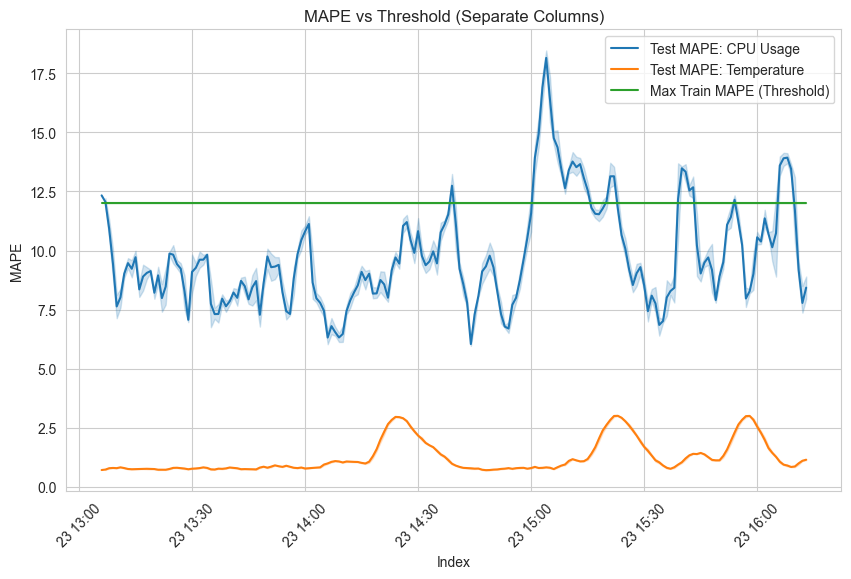

In [24]:
# Extract individual columns from testMAPE
jetson_total_cpu_usage = testMAPE[:, 0]
jetson_temperature = testMAPE[:, 1]

# Create anomaly DataFrame
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['jetson_total_cpu_usage'] = jetson_total_cpu_usage
anomaly_df['jetson_temperature'] = jetson_temperature
anomaly_df['max_trainMAPE'] = max_trainMAPE  # Threshold

# Anomalies for each column
anomaly_df['anomaly_cpu_usage'] = anomaly_df['jetson_total_cpu_usage'] > anomaly_df['max_trainMAPE']
anomaly_df['anomaly_temperature'] = anomaly_df['jetson_temperature'] > anomaly_df['max_trainMAPE']

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=anomaly_df.index, y=anomaly_df['jetson_total_cpu_usage'], label='Test MAPE: CPU Usage')
sns.lineplot(x=anomaly_df.index, y=anomaly_df['jetson_temperature'], label='Test MAPE: Temperature')
sns.lineplot(x=anomaly_df.index, y=anomaly_df['max_trainMAPE'], label='Max Train MAPE (Threshold)')
plt.xticks(rotation=45)
plt.xlabel("Index")
plt.ylabel("MAPE")
plt.title("MAPE vs Threshold (Separate Columns)")
plt.legend()
plt.show()


Number of rows where zero values were replaced: 594077
Remaining rows with zero values: 0
Start date is: 2024-11-29 20:40:32
End date is: 2024-12-06 20:40:32


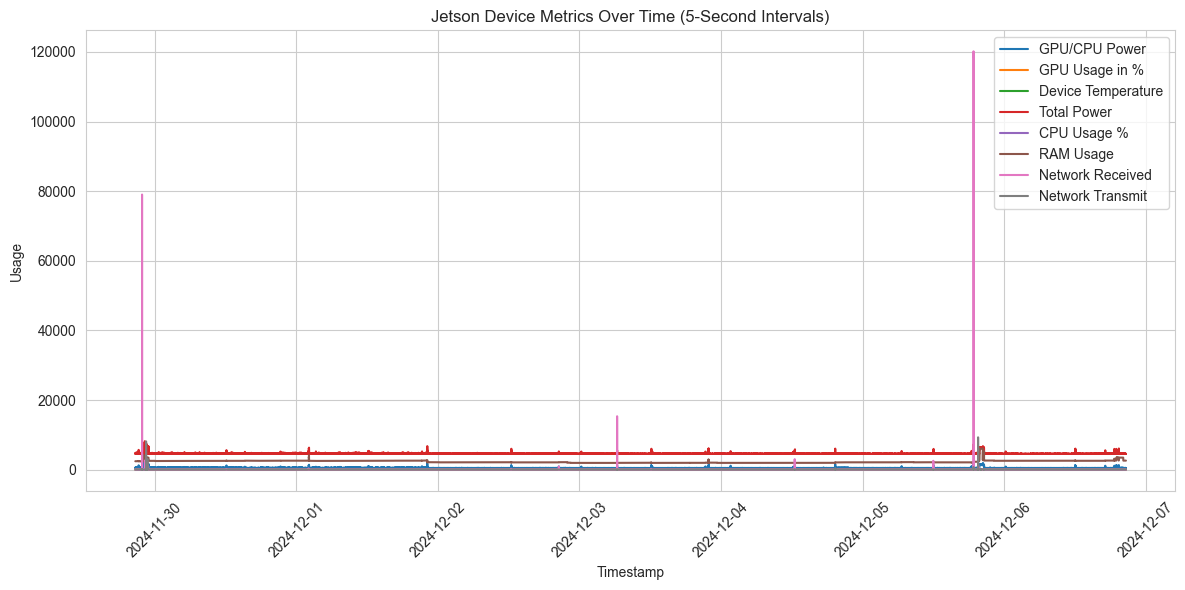

In [11]:
import numpy as np
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed 
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Load the dataset
data1 = pd.read_csv('FL_client/src/Train_data/NANO08/Nano08.csv')
dataframe = data1

# Convert 'timestamp' column to datetime
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])

# Filter relevant columns
df = dataframe[['timestamp', 'jetson_vdd_cpu_gpu_cv_mw', 'jetson_gpu_usage_percent', 'jetson_board_temperature_celsius', 'jetson_vdd_in_mw', 'jetson_cpu_usage_percent',
                'jetson_ram_usage_mb', 'node_network_receive_bytes_total_KBps', 'node_network_transmit_bytes_total_KBps']]
df.set_index('timestamp', inplace=True)

# Replace zero values with 0.01
df.replace(0, 0.01, inplace=True)

# Count the number of rows where zero values were replaced with 0.01
num_rows_with_zero_replaced = len(df[(df == 0.01).any(axis=1)])
print(f"Number of rows where zero values were replaced: {num_rows_with_zero_replaced}")

# Check if there are any remaining zero values
remaining_zeros = df[(df == 0).any(axis=1)]
print(f"Remaining rows with zero values: {len(remaining_zeros)}")

# Print start and end date
print("Start date is:", df.index.min())
print("End date is:", df.index.max())

# Filter data to include only rows with timestamps at 5-second intervals
df_5_sec = df[df.index.second % 5 == 0]

# Create the line plot for every 5-second data
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_5_sec.index, y='jetson_vdd_cpu_gpu_cv_mw', data=df_5_sec, label='GPU/CPU Power')
sns.lineplot(x=df_5_sec.index, y='jetson_gpu_usage_percent', data=df_5_sec, label='GPU Usage in %')
sns.lineplot(x=df_5_sec.index, y='jetson_board_temperature_celsius', data=df_5_sec, label='Device Temperature')
sns.lineplot(x=df_5_sec.index, y='jetson_vdd_in_mw', data=df_5_sec, label='Total Power')
sns.lineplot(x=df_5_sec.index, y='jetson_cpu_usage_percent', data=df_5_sec, label='CPU Usage %')
sns.lineplot(x=df_5_sec.index, y='jetson_ram_usage_mb', data=df_5_sec, label='RAM Usage')
sns.lineplot(x=df_5_sec.index, y='node_network_receive_bytes_total_KBps', data=df_5_sec, label='Network Received')
sns.lineplot(x=df_5_sec.index, y='node_network_transmit_bytes_total_KBps', data=df_5_sec, label='Network Transmit')
plt.title('Jetson Device Metrics Over Time (5-Second Intervals)')
plt.ylabel('Usage')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.gcf().set_facecolor('white')
plt.legend()
plt.tight_layout()
plt.show()


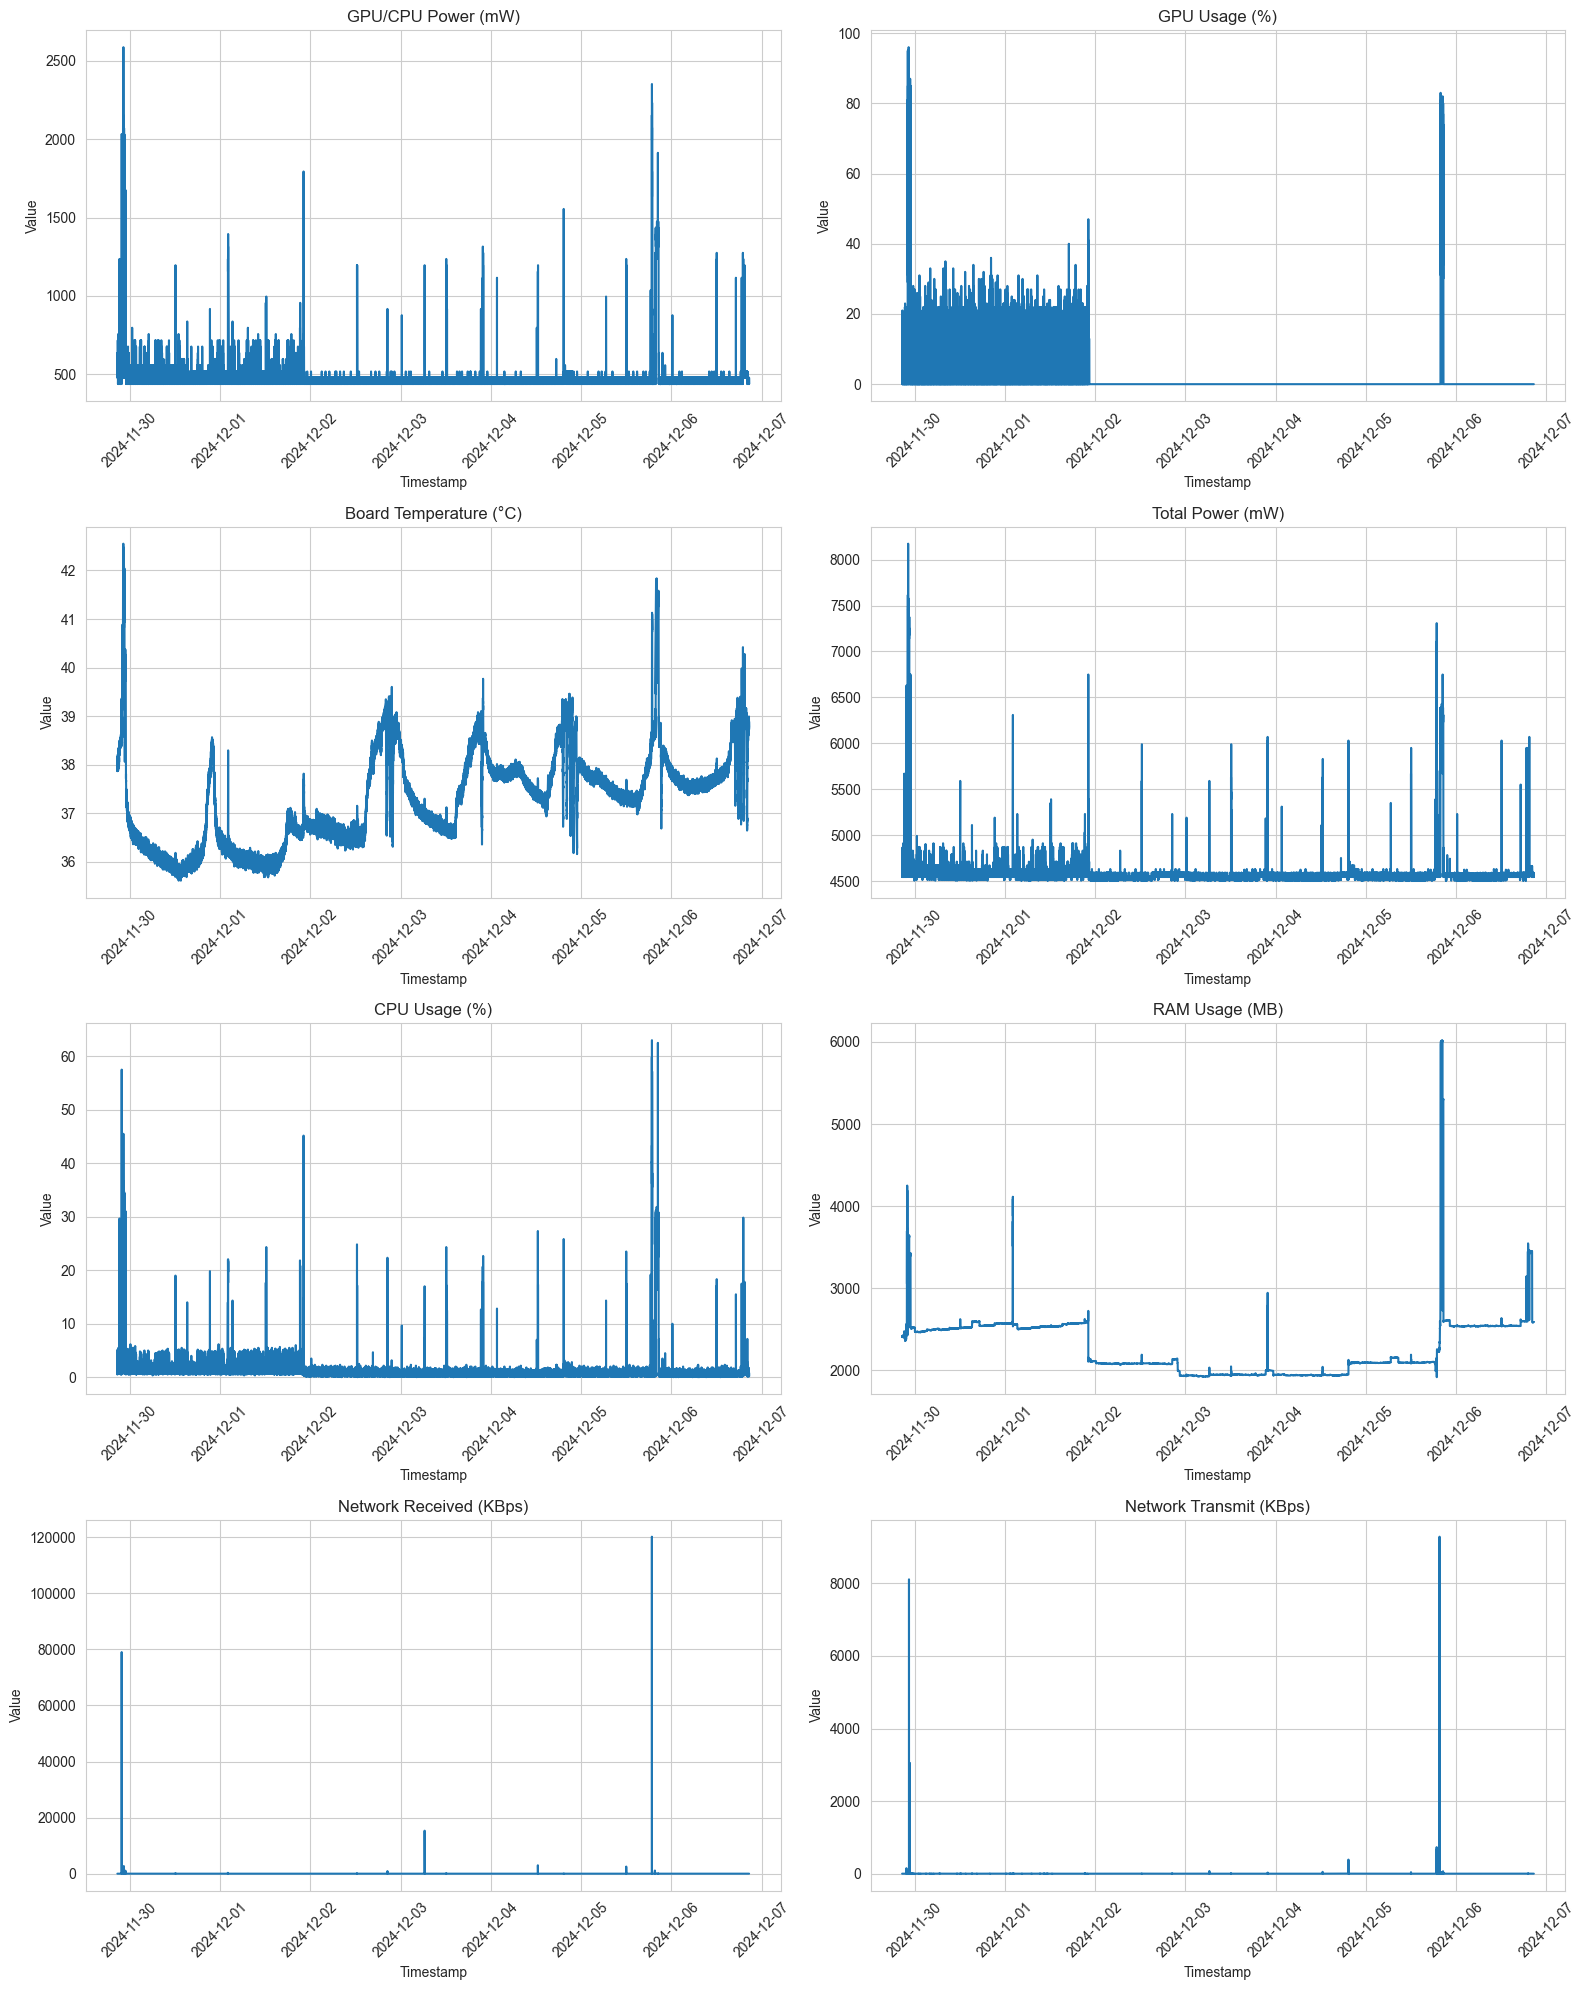

In [12]:
# Create subplots for each metric
metrics = [
    'jetson_vdd_cpu_gpu_cv_mw', 
    'jetson_gpu_usage_percent', 
    'jetson_board_temperature_celsius', 
    'jetson_vdd_in_mw', 
    'jetson_cpu_usage_percent', 
    'jetson_ram_usage_mb', 
    'node_network_receive_bytes_total_KBps', 
    'node_network_transmit_bytes_total_KBps'
]

titles = [
    'GPU/CPU Power (mW)', 
    'GPU Usage (%)', 
    'Board Temperature (°C)', 
    'Total Power (mW)', 
    'CPU Usage (%)', 
    'RAM Usage (MB)', 
    'Network Received (KBps)', 
    'Network Transmit (KBps)'
]

plt.figure(figsize=(16, 20))
for i, metric in enumerate(metrics):
    plt.subplot(4, 2, i + 1)
    sns.lineplot(x=df_5_sec.index, y=metric, data=df_5_sec)
    plt.title(titles[i])
    plt.ylabel('Value')
    plt.xlabel('Timestamp')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


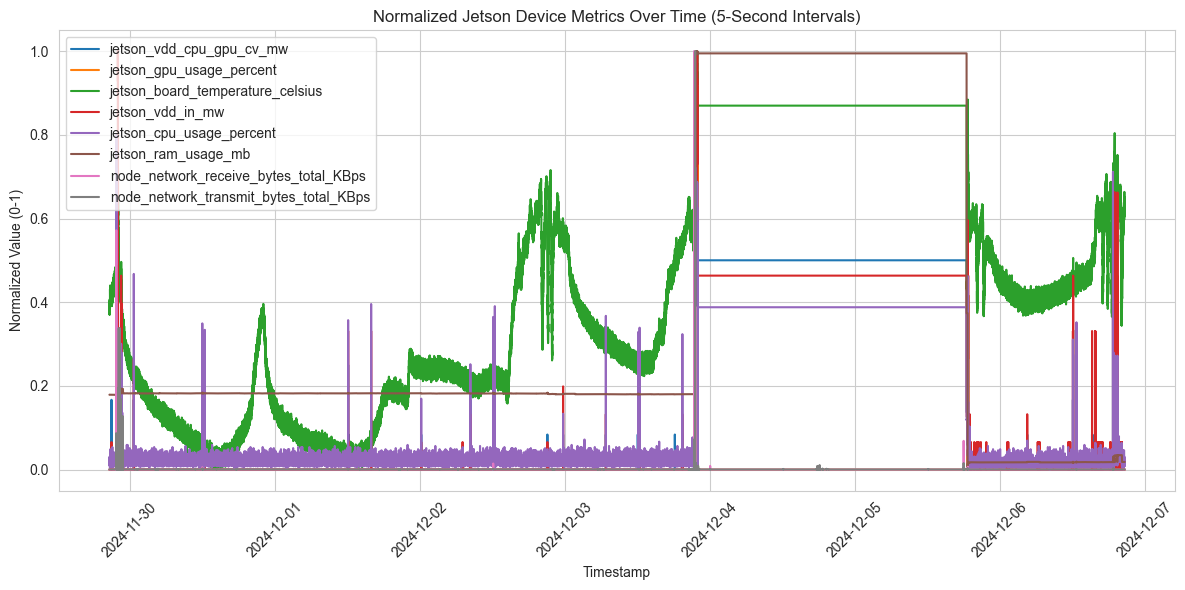

In [7]:
# Normalize each column to a 0-1 scale
df_normalized = (df_5_sec - df_5_sec.min()) / (df_5_sec.max() - df_5_sec.min())

# Plot normalized values
plt.figure(figsize=(12, 6))
for col in df_normalized.columns:
    sns.lineplot(x=df_5_sec.index, y=df_normalized[col], label=col)

plt.title('Normalized Jetson Device Metrics Over Time (5-Second Intervals)')
plt.ylabel('Normalized Value (0-1)')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.gcf().set_facecolor('white')
plt.legend()
plt.tight_layout()
plt.show()
